In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Scraping data from website using Beautiful Soup

In [2]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=3500'

In [3]:
snap = requests.get(url)

In [4]:
soup = BeautifulSoup(snap.text, 'html')

In [5]:
reviews = soup.find('article', class_= "comp comp_reviews-airline querylist position-content").find_all('table', class_="review-ratings")

In [6]:
reviews_data = []
for review in reviews:

    aircraftType = review.find('td', class_='review-rating-header aircraft')
    try:
        aircraftType = aircraftType.find_next_sibling('td').text
    except AttributeError:
        aircraftType = None
    
    seatType = review.find('td', class_='review-rating-header cabin_flown')
    try:
        seatType = seatType.find_next_sibling('td').text
    except AttributeError:
        seatType = None
    
    seatComfort = review.find('td', class_='review-rating-header seat_comfort')
    try:
        seatComfort = seatComfort.find_next_sibling('td')
        filled_stars = seatComfort.find_all('span', class_='star fill')
        seatComfort = len(filled_stars)  # Count the number of filled stars
    except (AttributeError, TypeError):
        seatComfort = None
    
    cabinStaff = review.find('td', class_='review-rating-header cabin_staff_service')
    try:
        cabinStaff = cabinStaff.find_next_sibling('td')
        filled_stars = cabinStaff.find_all('span', class_='star fill')
        cabinStaff = len(filled_stars)  # Count the number of filled stars
    except (AttributeError, TypeError):
        cabinStaff = None
    
    foodBeverages = review.find('td', class_='review-rating-header food_and_beverages')
    try:
        foodBeverages = foodBeverages.find_next_sibling('td')
        filled_stars = foodBeverages.find_all('span', class_='star fill')
        foodBeverages = len(filled_stars)  # Count the number of filled stars
    except (AttributeError, TypeError):
        foodBeverages = None
    
    valueforMoney = review.find('td', class_='review-rating-header value_for_money')
    try:
        valueforMoney = valueforMoney.find_next_sibling('td')
        filled_stars = valueforMoney.find_all('span', class_='star fill')
        valueforMoney = len(filled_stars)  # Count the number of filled stars
    except (AttributeError, TypeError):
        valueforMoney = None
    
    recommendation = review.find('td', class_='review-rating-header recommended')
    try:
        recommendation = recommendation.find_next_sibling('td').text
    except AttributeError:
        recommendation = None
    
    reviews_data.append([aircraftType, seatType, seatComfort, cabinStaff, foodBeverages, valueforMoney, recommendation])


In [7]:
reviews_data = pd.DataFrame(reviews_data, columns=['AirplaneType','Class','SeatRating','StaffRating','FoodRating','ValueForMoney','Recommendation'])

In [8]:
reviews_data

,AirplaneType,Class,SeatRating,StaffRating,FoodRating,ValueForMoney,Recommendation
0,Boeing 777,Business Class,5.0,5.0,4.0,2,yes
1,Boeing 777,Premium Economy,4.0,4.0,4.0,3,yes
2,None,Economy Class,1.0,3.0,2.0,1,no
3,A320,Business Class,1.0,5.0,5.0,4,no
4,A320,Business Class,5.0,5.0,5.0,5,yes
...,...,...,...,...,...,...,...
3495,None,Economy Class,2.0,2.0,1.0,1,no
3496,None,Economy Class,1.0,1.0,1.0,1,no
3497,None,Economy Class,4.0,5.0,4.0,4,yes
3498,None,Economy Class,4.0,5.0,3.0,4,yes


# Cleaning our dataset 

In [9]:
reviews_data.isnull().sum()

AirplaneType      1511
Class                2
SeatRating         121
StaffRating        134
FoodRating         411
ValueForMoney        0
Recommendation       0
dtype: int64

In [10]:
mean_food_rating = reviews_data["FoodRating"].mean()     #Finding mean for the particular coloumn
reviews_data["FoodRating"].fillna(mean_food_rating, inplace=True)      #Replacing the empty value with the mean of the coloumn

In [11]:
mean_staff_rating = reviews_data["StaffRating"].mean()
reviews_data["StaffRating"].fillna(mean_staff_rating, inplace=True)

In [12]:
mean_seat_rating = reviews_data["SeatRating"].mean()
reviews_data["SeatRating"].fillna(mean_seat_rating, inplace=True)

In [13]:
reviews_data.dropna(inplace = True)

In [14]:
reviews_data.drop(reviews_data.loc[reviews_data['SeatRating'] == 2.8328896776101744].index, inplace=True)

In [15]:
reviews_data.drop(reviews_data.loc[reviews_data['FoodRating'] == 2.6806451612903226].index, inplace=True)

In [16]:
reviews_data.isnull().sum()

AirplaneType      0
Class             0
SeatRating        0
StaffRating       0
FoodRating        0
ValueForMoney     0
Recommendation    0
dtype: int64

# Data Analysis

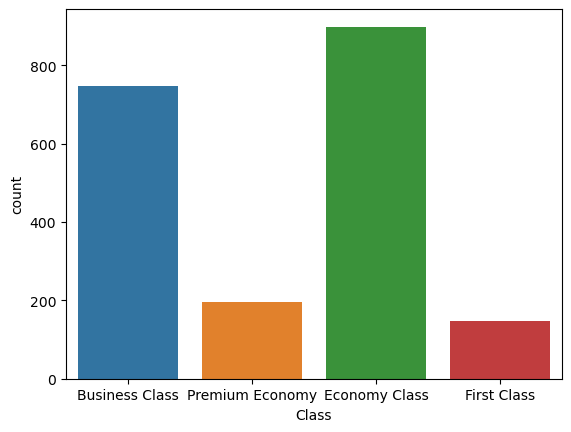

In [17]:
Class = sns.countplot(x = 'Class', data = reviews_data) #Number of users from EACH CLASS

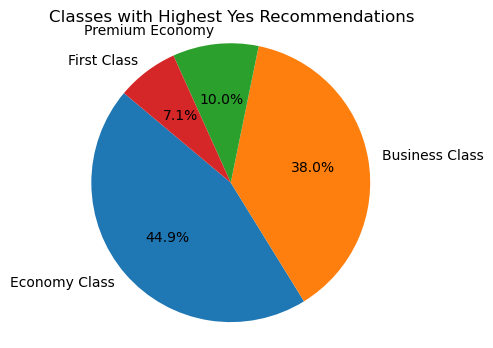

In [18]:
# To filter the dataframe to include only rows where Recommendation is 'yes'
yes_recommendations = reviews_data[reviews_data['Recommendation'] == 'yes']

class_counts = yes_recommendations['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Classes with Highest Yes Recommendations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


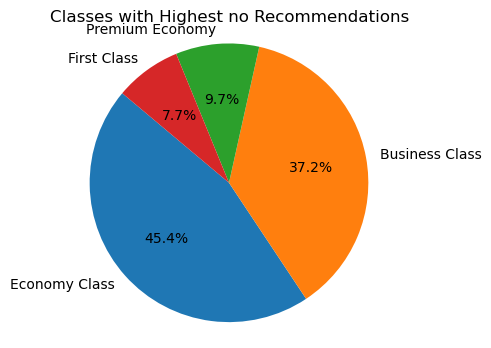

In [19]:
# To filter the dataframe to include only rows where Recommendation is 'no'
yes_recommendations = reviews_data[reviews_data['Recommendation'] == 'no']

class_counts = yes_recommendations['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Classes with Highest no Recommendations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

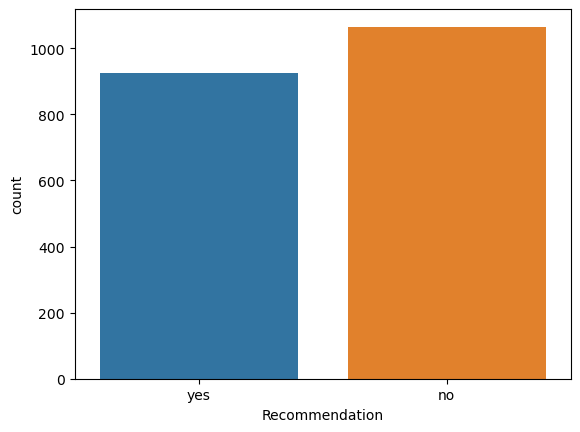

In [20]:
rec = sns.countplot(x = 'Recommendation', data = reviews_data)

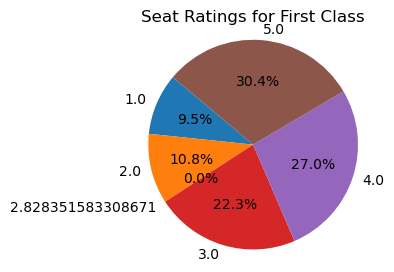

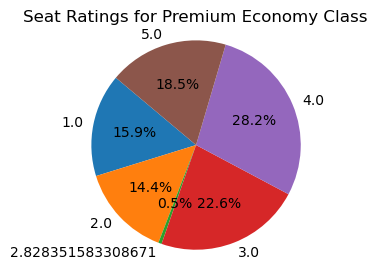

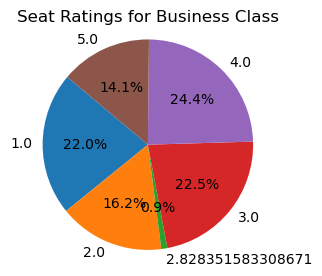

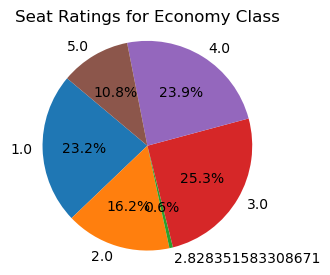

In [21]:
#Seat Rating
grouped_data = reviews_data.groupby(['SeatRating', 'Class']).size().unstack(fill_value=0)

# Plotting the pie chart for Business class seat ratings
First = grouped_data.loc[:, 'First Class']
labels = First.index
sizes = First.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Seat Ratings for First Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Premium_Economy_ratings = grouped_data.loc[:, 'Premium Economy']
labels = Premium_Economy_ratings.index
sizes = Premium_Economy_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Seat Ratings for Premium Economy Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


business_class_ratings = grouped_data.loc[:, 'Business Class']
labels = business_class_ratings.index
sizes = business_class_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Seat Ratings for Business Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Economy_class_ratings = grouped_data.loc[:, 'Economy Class']
labels = Economy_class_ratings.index
sizes = Economy_class_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Seat Ratings for Economy Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

By Observing the seat rating diagram we get to know that Economy and Business class needs to be improved 

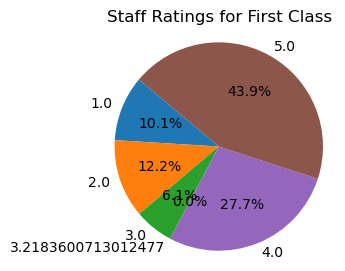

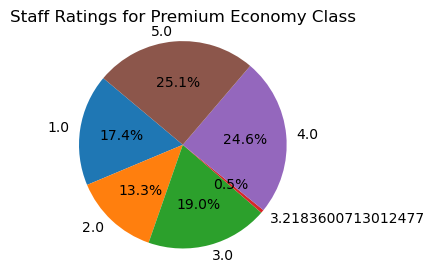

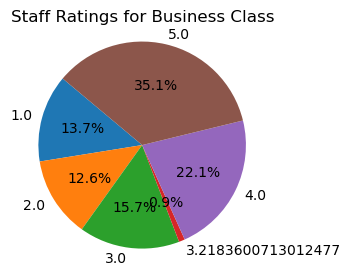

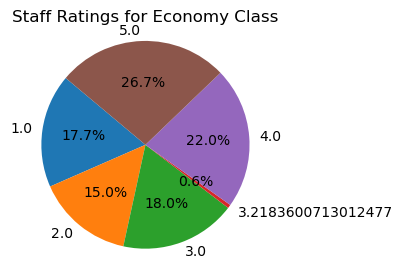

In [22]:
#Staff Rating
grouped_data = reviews_data.groupby(['StaffRating', 'Class']).size().unstack(fill_value=0)

# Plotting the pie chart for Business class seat ratings
First = grouped_data.loc[:, 'First Class']
labels = First.index
sizes = First.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Staff Ratings for First Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Premium_Economy_ratings = grouped_data.loc[:, 'Premium Economy']
labels = Premium_Economy_ratings.index
sizes = Premium_Economy_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Staff Ratings for Premium Economy Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


business_class_ratings = grouped_data.loc[:, 'Business Class']
labels = business_class_ratings.index
sizes = business_class_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Staff Ratings for Business Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Economy_class_ratings = grouped_data.loc[:, 'Economy Class']
labels = Economy_class_ratings.index
sizes = Economy_class_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Staff Ratings for Economy Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Overall if we observe staff we found out that Staff have been overall good among all classes 

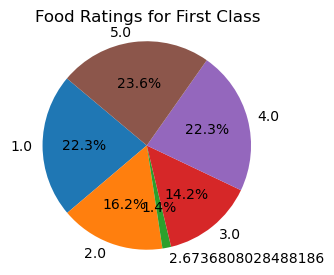

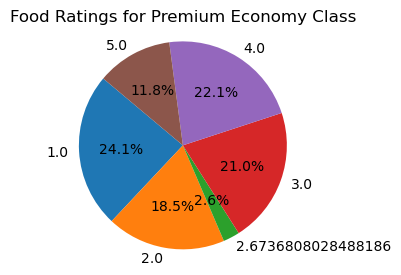

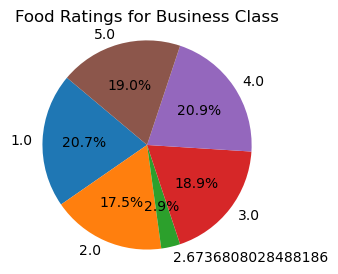

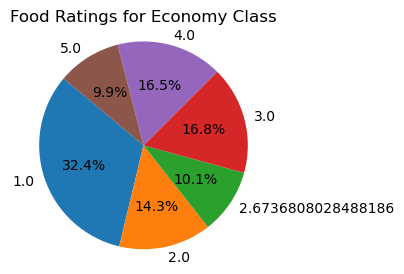

In [23]:
#Food Rating
grouped_data = reviews_data.groupby(['FoodRating', 'Class']).size().unstack(fill_value=0)

# Plotting the pie chart for Business class seat ratings
First = grouped_data.loc[:, 'First Class']
labels = First.index
sizes = First.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Food Ratings for First Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Premium_Economy_ratings = grouped_data.loc[:, 'Premium Economy']
labels = Premium_Economy_ratings.index
sizes = Premium_Economy_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Food Ratings for Premium Economy Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


business_class_ratings = grouped_data.loc[:, 'Business Class']
labels = business_class_ratings.index
sizes = business_class_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Food Ratings for Business Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Economy_class_ratings = grouped_data.loc[:, 'Economy Class']
labels = Economy_class_ratings.index
sizes = Economy_class_ratings.values

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Food Ratings for Economy Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Here by observing the food rating pie chart we observe that Business and First class serves better food as compared to Economy and Premium Economy.

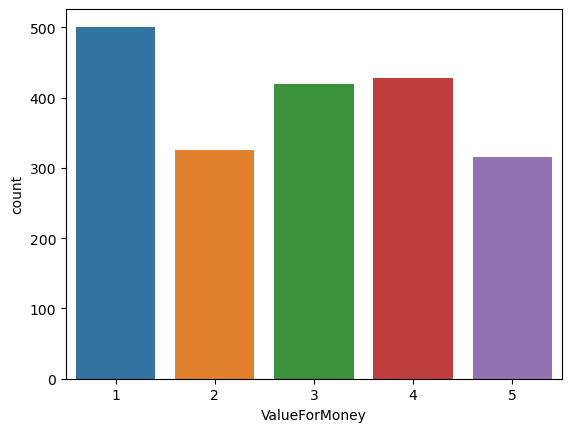

In [24]:
Class = sns.countplot(x = 'ValueForMoney', data = reviews_data)

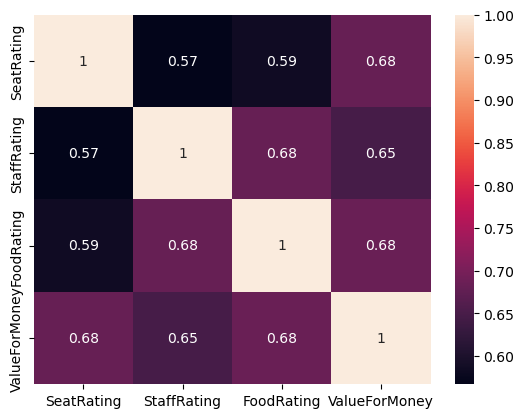

In [25]:
dataplot = sns.heatmap(reviews_data.corr(), annot=True) 
plt.show()

In [26]:
reviews_data

,AirplaneType,Class,SeatRating,StaffRating,FoodRating,ValueForMoney,Recommendation
0,Boeing 777,Business Class,5.0,5.0,4.000000,2,yes
1,Boeing 777,Premium Economy,4.0,4.0,4.000000,3,yes
3,A320,Business Class,1.0,5.0,5.000000,4,no
4,A320,Business Class,5.0,5.0,5.000000,5,yes
6,Boeing 747,Business Class,1.0,1.0,2.673681,1,no
...,...,...,...,...,...,...,...
3037,Boeing 777,Business Class,3.0,4.0,3.000000,3,no
3038,Airbus 319,Business Class,3.0,5.0,2.673681,4,yes
3040,Boeing 747-400,Business Class,4.0,5.0,4.000000,5,yes
3041,Boeing 747-400,Business Class,4.0,2.0,3.000000,3,yes
